# Time Series Analysis of stock market data

### Analyzing stock price data of three car companies namely Tesla , Ford and GM from Jan 1 '12 to July 31 '20. 

In [2]:
#Importing the various required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Part 1: Getting the Data


### Tesla Stock (Ticker: TSLA on the NASDAQ)

In [3]:
# Using pandas_datareader to obtain the historical stock price information for Tesla from Jan 1, 2012 to July 31, 2020.
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2020,7,31)
Tesla = web.DataReader('TSLA' , 'yahoo' , start = start , end = end)
Tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,1547.939941,1413.000000,1435.0,1539.599976,16048700,1539.599976
2020-07-28,1564.699951,1474.420044,1504.0,1476.489990,15808700,1476.489990
2020-07-29,1534.810059,1487.000000,1501.0,1499.109985,9426900,1499.109985
2020-07-30,1513.239990,1471.000000,1488.0,1487.489990,7621000,1487.489990
2020-07-31,1517.050049,1420.979980,1515.0,1430.760010,12247000,1430.760010


### Other Car Companies

**Repeating the same steps to grab data for Ford and GM (General Motors)**

In [4]:
# Using pandas_datareader to obtain the historical stock price information for Ford from Jan 1, 2012 to July 31, 2020.
Ford = web.DataReader('F' , 'yahoo' , start = start , end = end)
Ford.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,6.94,6.77,6.92,6.93,60370200.0,6.93
2020-07-28,7.05,6.90,6.90,7.01,56312500.0,7.01
2020-07-29,7.06,6.83,7.05,6.92,59437200.0,6.92
2020-07-30,6.83,6.67,6.74,6.74,58991000.0,6.74
2020-07-31,6.90,6.52,6.89,6.61,115394100.0,6.61


In [5]:
# Using pandas_datareader to obtain the historical stock price information for GM from Jan 1, 2012 to July 31, 2020.
GM = web.DataReader('GM' , 'yahoo' , start , end)
GM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-27,25.920000,25.309999,25.879999,25.700001,16598100.0,25.700001
2020-07-28,26.750000,25.690001,25.780001,26.330000,12854300.0,26.330000
2020-07-29,27.049999,24.930000,27.040001,25.889999,28792100.0,25.889999
2020-07-30,25.459999,25.020000,25.129999,25.200001,16012000.0,25.200001
2020-07-31,25.150000,24.440001,25.120001,24.889999,17789000.0,24.889999


## Part 2: Visualizing the Data.

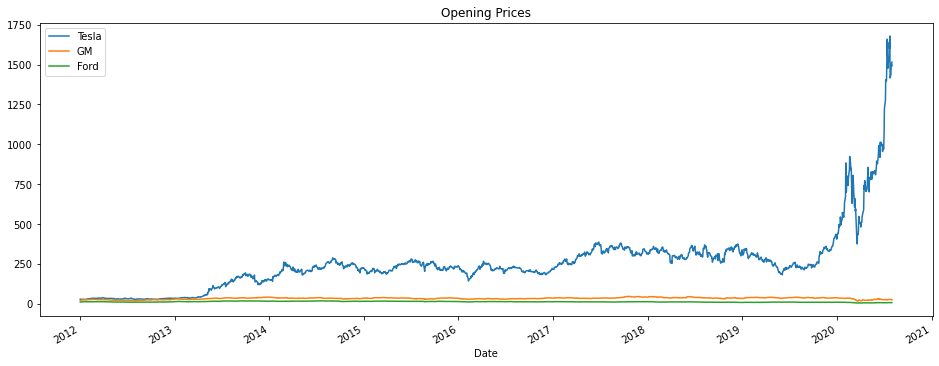

In [6]:
# Plotting the Open price of stock traded each day.
Tesla['Open'].plot(figsize = (16,6),title = 'Opening Prices')
GM['Open'].plot()
Ford['Open'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Plotting the Volume of stock traded each day.**

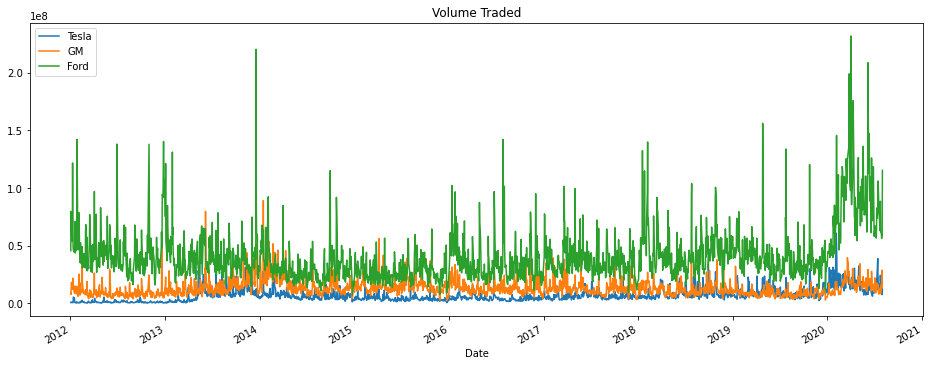

In [7]:
Tesla['Volume'].plot(figsize = (16,6) , title = 'Volume Traded')
GM['Volume'].plot()
Ford['Volume'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Looks like Ford had a really big spike somewhere in 2020. What was the date of this maximum trading volume for Ford?**

**What happened that day?**

In [8]:
# Finding the date of maximum trading volume for Ford
Ford[Ford['Volume'] == Ford['Volume'].max()].index[0]  # Ford['Volume'].argmax()

Timestamp('2020-03-31 00:00:00')

 News :- Ford Joins Effort to Make Ventilators amid the coronavirus pandemic.

The Open Price Time Series Visualization makes Tesla look like it always has been much more valuable as a company than GM and Ford.  

**As a simple calcualtion , we are representing total market cap with the total money traded around using the time series.**

In [9]:
# Creating a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.
Tesla['Total Traded'] = Tesla['Open']*Tesla['Volume']
Ford['Total Traded'] = Ford['Open']*Ford['Volume']
GM['Total Traded'] = GM['Open']*GM['Volume']

**Plotting "Total Traded" against the time index.**

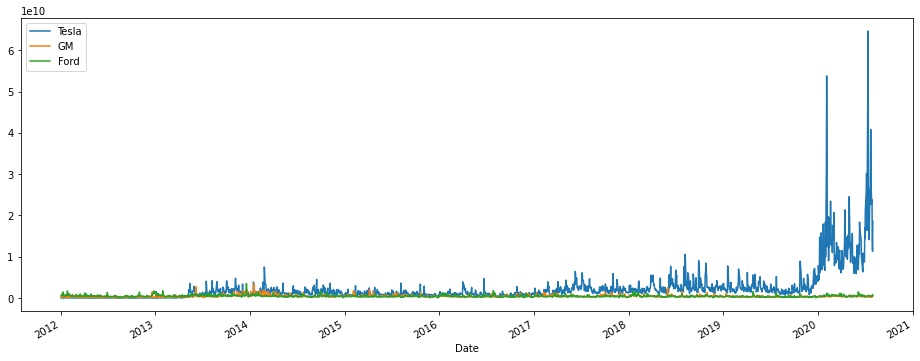

In [10]:
Tesla['Total Traded'].plot(figsize = (16,6))
GM['Total Traded'].plot()
Ford['Total Traded'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford']);

**Interesting, looks like there was huge amount of money traded for Tesla in early as well as in mid 2020. What date was that and what happened?**

In [11]:
# # Finding the date of maximum money traded for Tesla
Tesla[Tesla['Total Traded'] == Tesla['Total Traded'].max()].index[0] # Tesla['Total Traded].argmax()

Timestamp('2020-07-13 00:00:00')

3th and 4th Feb : Tesla’s Stock is Up 36% in Two Days.
Traders who bet against Tesla’s success could be the ones now pushing the share price higher as in the fourth quarter, 
Company generated 1 billion dollars in cash even after capital expenditures and posted its second straight quarterly profit.

13th July : Shares of Tesla rose more than 16% to a new all-time high , before giving back those gains and falling into negative territory. 
During morning trading, Tesla’s market value got increased to 321 billion dollars making it the 10th-largest U.S. stock by market value.

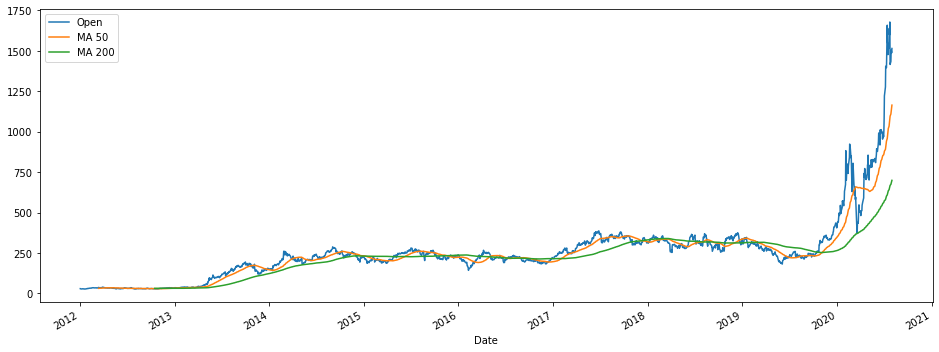

In [12]:
# Plotting out MA (Moving Averages) MA50 and MA200 for Tesla
Tesla['MA 50'] = Tesla['Open'].rolling(50).mean()
Tesla['MA 200'] = Tesla['Open'].rolling(200).mean()
Tesla[['Open' , 'MA 50' , 'MA 200']].plot(figsize = (16,6));

**Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry.**

**We can see this easily through a scatter matrix plot.**

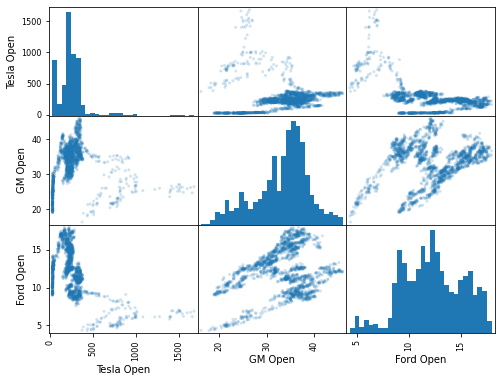

In [13]:
# Creating a scatter matrix plot of all the stocks'opening price
from pandas.plotting import scatter_matrix
Open_DataFrame = pd.DataFrame({ 'Tesla Open': Tesla['Open'], 'GM Open': GM['Open'] , 'Ford Open': Ford['Open']})
scatter_matrix(Open_DataFrame , diagonal = 'hist' , alpha = 0.2 , figsize = (8,6) , hist_kwds = {'bins' : 30});

### Candlestick Visualization 

**Helpful Link :- https://matplotlib.org/examples/pylab_examples/finance_demo.html**

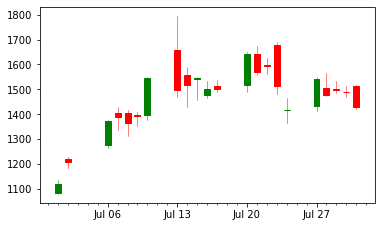

In [15]:
# Creating daily candlestick chart of Tesla stock in July 2020.
import mplfinance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Rest the index to get a column of January Dates
Tesla_reset = Tesla.loc['2020-07':'2020-07'].reset_index()

# Create a new column of numerical "date" values for matplotlib to use
Tesla_reset['date_ax'] = Tesla_reset['Date'].apply(lambda date: date2num(date))
Tesla_values = [tuple(vals) for vals in Tesla_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()                  # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, Tesla_values, width=0.6, colorup='g',colordown='r');

# Part 3: Basic Financial Analysis

## Daily Percentage Change
Firstly , we will calculate the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs us of your percent gain (or loss) if one bought the stock say today and then sold it the next day. This metric is very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [16]:
# Creating a new column returns for Tesla dataframe.
Tesla['Returns'] = Tesla['Close'].pct_change(1)
Tesla.tail()

# Method 2 : Tesla['Returns'] = (Tesla['Close'] / Tesla['Close'].shift(1)) - 1 

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA 50,MA 200,Returns
Date,,,,,,,,,,
2020-07-27,1547.939941,1413.000000,1435.0,1539.599976,16048700,1539.599976,2.302988e+10,1109.410601,674.021101,0.086521
2020-07-28,1564.699951,1474.420044,1504.0,1476.489990,15808700,1476.489990,2.377628e+10,1123.683601,680.314701,-0.040991
2020-07-29,1534.810059,1487.000000,1501.0,1499.109985,9426900,1499.109985,1.414978e+10,1137.148000,686.583951,0.015320
2020-07-30,1513.239990,1471.000000,1488.0,1487.489990,7621000,1487.489990,1.134005e+10,1150.604601,692.784451,-0.007751
2020-07-31,1517.050049,1420.979980,1515.0,1430.760010,12247000,1430.760010,1.855420e+10,1164.494601,699.070951,-0.038138


In [17]:
# Creating a new column returns for Ford dataframe.
Ford['Returns'] = Ford['Close'].pct_change(1) 
Ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.836860,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.956559,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.160754,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.245250,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.308619,6.386011e+08,0.007686


In [18]:
# Creating a new column returns for GM dataframe.
GM['Returns'] = GM['Close'].pct_change(1)
GM.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2020-07-27,25.920000,25.309999,25.879999,25.700001,16598100.0,25.700001,4.295588e+08,-0.020952
2020-07-28,26.750000,25.690001,25.780001,26.330000,12854300.0,26.330000,3.313839e+08,0.024514
2020-07-29,27.049999,24.930000,27.040001,25.889999,28792100.0,25.889999,7.785384e+08,-0.016711
2020-07-30,25.459999,25.020000,25.129999,25.200001,16012000.0,25.200001,4.023815e+08,-0.026651
2020-07-31,25.150000,24.440001,25.120001,24.889999,17789000.0,24.889999,4.468597e+08,-0.012302


**Plotting histogram of each companies' returns to see which stock is the most "volatile"? ( Judged by the variance in the daily returns)**

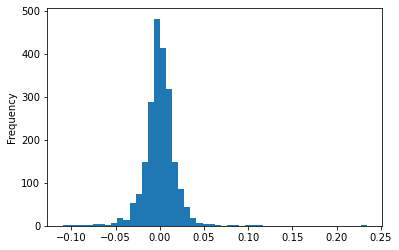

In [19]:
# Plotting histogram of Ford's returns
Ford['Returns'].plot.hist(bins = 50);

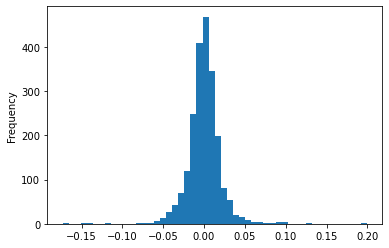

In [20]:
# Plotting histogram of GM's returns
GM['Returns'].plot.hist(bins = 50);

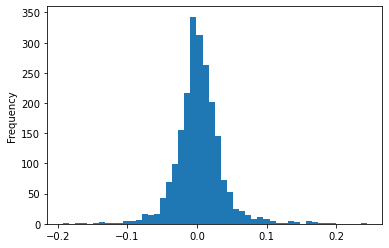

In [21]:
# Plotting histogram of Tesla's returns
Tesla['Returns'].plot.hist(bins = 50);

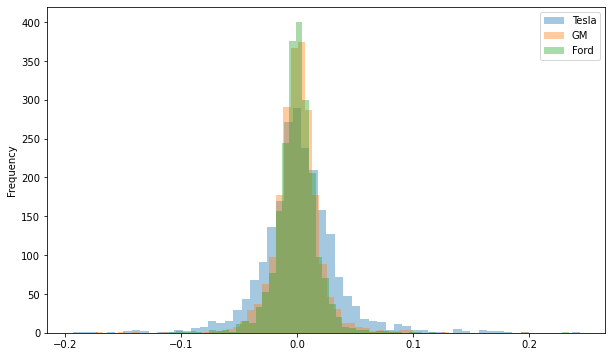

In [22]:
# Plotting histogram of all the three comapnies' returns
Tesla['Returns'].plot.hist(figsize = (10,6) , bins = 60 , alpha = 0.4)
GM['Returns'].plot.hist(bins = 60 , alpha = 0.4)
Ford['Returns'].plot.hist(bins = 60 , alpha = 0.4)
plt.legend(['Tesla' , 'GM' , 'Ford']);

#### Tesla is the most volatile stock in comparison with GM and Ford.

**Plotting a KDE instead of histograms for another view point. Which stock has the widest plot?**

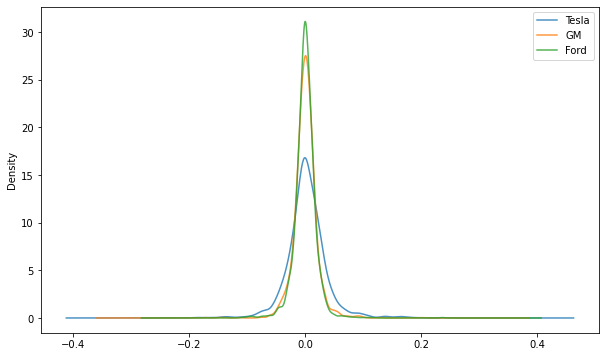

In [23]:
Tesla['Returns'].plot.kde(figsize = (10,6) , label = 'Tesla' , alpha = 0.8)
GM['Returns'].plot.kde(label = 'GM' , alpha = 0.8)
Ford['Returns'].plot.kde(label = 'Ford' , alpha = 0.8)
plt.legend();

## Comparing Daily Returns between Stocks

In [24]:
# Creating Returns dataframe for each of the stock
Returns_Df = pd.DataFrame({'Tesla Returns': Tesla['Returns'], 
                           'GM Returns': GM['Returns'] , 
                           'Ford Returns': Ford['Returns']})

#Another way of creating the dataframe

#Returns_Df = pd.concat([Tesla['Returns'] , GM['Returns'] , Ford['Returns']] , axis = 1)
#Returns_Df.columns = ['Tesla Returns' , 'GM Returns' , 'Ford Returns']
#Returns_Df

**Creating a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

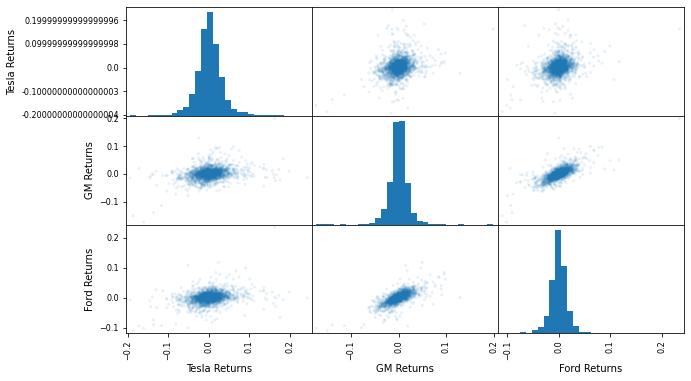

In [25]:
scatter_matrix(Returns_Df , diagonal = 'hist' , alpha = 0.1 , figsize = (10,6) , hist_kwds = {'bins' : 30});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against each other in scatter plot to view this more closely!

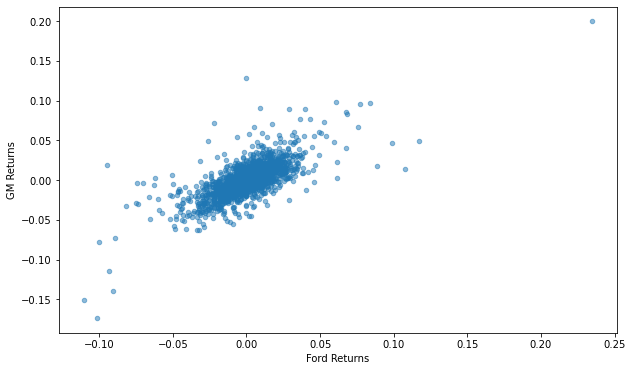

In [26]:
Returns_Df.plot.scatter(x = 'Ford Returns' , y= 'GM Returns' , figsize = (10,6) , alpha = 0.5);

## Cumulative Daily Returns

Now we can see which stock was the most wide ranging in daily returns.

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend.

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

**Creating a cumulative daily return column for each car company's dataframe.**

In [27]:
Tesla['cumulative_return'] = ( 1 + Tesla['Returns'] ).cumprod()
GM['cumulative_return'] = ( 1 + GM['Returns'] ).cumprod()
Ford['cumulative_return'] = ( 1 + Ford['Returns'] ).cumprod()

In [28]:
# Cumulative daily return for tesla
Tesla['cumulative_return'].tail()

Date
2020-07-27    54.829059
2020-07-28    52.581553
2020-07-29    53.387108
2020-07-30    52.973290
2020-07-31    50.952992
Name: cumulative_return, dtype: float64

##### 1 dollar invested in 2012 in Tesla would have become 51 dollar as of 31st July 2020.

In [29]:
# Cumulative daily return for GM
GM['cumulative_return'].tail()

Date
2020-07-27    1.220903
2020-07-28    1.250831
2020-07-29    1.229929
2020-07-30    1.197150
2020-07-31    1.182423
Name: cumulative_return, dtype: float64

In [30]:
# Cumulative daily return for Ford
Ford['cumulative_return'].tail()

Date
2020-07-27    0.622641
2020-07-28    0.629829
2020-07-29    0.621743
2020-07-30    0.605571
2020-07-31    0.593890
Name: cumulative_return, dtype: float64

**Now plotting the Cumulative Return columns against the time series index. Which stock showed the highest return for a 1 dollar invested? Which showed the lowest?**

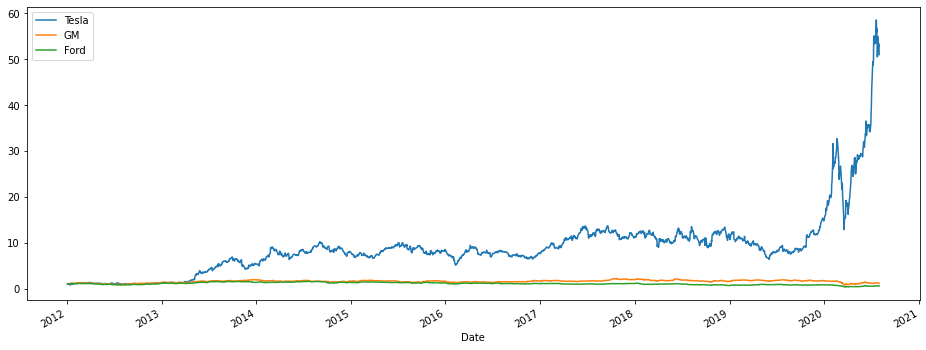

In [31]:
Tesla['cumulative_return'].plot(figsize = (16,6))
GM['cumulative_return'].plot()
Ford['cumulative_return'].plot()
plt.legend(['Tesla' , 'GM' , 'Ford'])